## Human Evaluation

In [1]:
from datasets import load_dataset, load_metric
from transformers import logging
logging.set_verbosity_error()

In [34]:
# Check the instructions for evaluating the generated responses
dataset_name = "tatsu-lab/alpaca"  # Replace with your dataset
dataset = load_dataset(dataset_name)

# Select just 5 enteries 
# dataset = dataset['train'].shuffle(seed=42).select(range(5))

# Split the dataset into train and test with a fixed seed
train_test_split = dataset['train'].train_test_split(test_size=0.0005, seed=42)
# train_dataset = train_test_split['train']
test_dataset = train_test_split['test']


[x['instruction'] for x in test_dataset]

['What would be the best type of exercise for a person who has arthritis?',
 'Calculate the atomic mass for lithium.',
 'Convert the following binary code to ASCII characters.',
 'Take this sentence and make it more descriptive: She was scared.',
 'Brainstorm 3 possible ideas to promote the following product',
 'Rewrite the sentence using imperative mood.',
 'Describe a picnic vacation where four people are travelling together.',
 'Explain the concept of Big Data and what it means for companies and customers.',
 'Analyze the given phrase in terms of its connotations.',
 'List three potential sources for the following research problem.',
 'Arrange the following countries in ascending order of GDP per capita.',
 'Name the boat depicted in the provided photo.',
 'Edit the grammar and punctuation of the given sentence.',
 'Calculate the length of the hypotenuse in the following triangle.',
 'How many instruments does a symphony orchestra typically have?',
 'Summarize the phrase: "GPT is a 

In [2]:
import os

folder_path = 'data/section_2'
files = os.listdir(folder_path)

for file in files:
    if file.endswith('.json'):
        print(file)

Llama-2-7b-hf-finetuned_topk50_nb5_t1_HE_score.json
Llama-2-7b-hf-finetuned_topk50_nb5_t1_HE.json
Mistral-7B-finetuned_topk50_nb5_t1_HE_score.json
phi-2-finetuned_topk50_nb5_t1.json
phi-2-finetuned_topk50_nb5_t1_HE_score.json
Llama-2-7b-hf-finetuned_topk50_nb5_t1.json
phi-2-finetuned_topk50_nb5_t1_HE.json
Mistral-7B-finetuned_topk50_nb5_t1.json
phi-2-finetuned_topk50_nb5_t1_score.json
Llama-2-7b-hf-finetuned_topk50_nb5_t1_score.json
Mistral-7B-finetuned_topk50_nb5_t1_score.json
Mistral-7B-finetuned_topk50_nb5_t1_HE.json


## Create HE_score files and also create a table for section 2

In [12]:
# # ********** Calculate average of Human Evaluation scores for each model in section 2 of assignment (for each model run the cell) **********

# import json

# file_name = 'data/Mistral-7B-finetuned_topk50_nb5_t1_HE'
# # Load the data from the JSON file
# with open(file_name+'.json', 'r') as file:
#     data = json.load(file)

# # Initialize variables to store the sum of each score
# sum_grammatical_correctness = 0
# sum_coherence = 0
# sum_correctness_of_answer = 0

# # Calculate the sum of each score
# for entry in data:
#     sum_grammatical_correctness += entry['grammatical_correctness']
#     sum_coherence += entry['coherence']
#     sum_correctness_of_answer += entry['correctness_of_answer']

# # Calculate the average of each score
# avg_grammatical_correctness = sum_grammatical_correctness / len(data)
# avg_coherence = sum_coherence / len(data)
# avg_correctness_of_answer = sum_correctness_of_answer / len(data)

# # Calculate the total average of all scores
# total_average = (avg_grammatical_correctness + avg_coherence + avg_correctness_of_answer) / 3

# averages = {
#     "average_grammatical_correctness": avg_grammatical_correctness,
#     "average_coherence": avg_coherence,
#     "average_correctness_of_answer": avg_correctness_of_answer,
#     "human_evaluation_average": total_average
# }

# # Save the averages to a JSON file
# with open(file_name+'_score.json', 'w') as file:
#     json.dump(averages, file, indent=4)

# # Print the sum and average of each score, and the total average
# print(f"Average of Grammatical Correctness: {avg_grammatical_correctness}")
# print(f"Average of Coherence: {avg_coherence}")
# print(f"Average of Correctness of Answer: {avg_correctness_of_answer}")
# print(f"Total Average of All Scores: {total_average}")

Average of Grammatical Correctness: 0.8888888888888888
Average of Coherence: 0.8888888888888888
Average of Correctness of Answer: 0.7592592592592593
Total Average of All Scores: 0.8456790123456791


In [3]:
import pandas as pd
import os
import json
from tabulate import tabulate

path = 'data/section_2/'
score_files = []
he_score_files = []

files = os.listdir(path)

for file in files:
    if file.endswith('t1_score.json'):
        score_files.append(file)
    elif file.endswith('_HE_score.json'):
        he_score_files.append(file)


columns = ['Model Name', 'BLEU', 'ROUGE-L', 'BERTScore', 'Perplexity', 'Human Evaluation']
df = pd.DataFrame(columns=columns)

def extract_scores(file_path):
    with open(path+file_path, 'r') as file:
        data = json.load(file)
    return {
        'BLEU': data.get('BLEU', None),
        'ROUGE-L': data.get('ROUGE-L', None),
        'BERTScore': data.get('BERTScore', None),
        'Perplexity': data.get('Perplexity', None)
    }

def extract_he_scores(file_path):
    with open(path+file_path, 'r') as file:
        data = json.load(file)
    human_evaluation = data.get('human_evaluation_average', 0)
    return {'Human Evaluation': human_evaluation}

for score_file in score_files:
    model_name = score_file.split('/')[-1].split('_score.json')[0]
    he_score_filename = f'{model_name}_HE_score.json'
    
    scores = extract_scores(score_file)
    if he_score_filename in he_score_files:
        scores.update(extract_he_scores(he_score_filename))
    
    scores['Model Name'] = model_name
    df = pd.concat([df, pd.DataFrame([scores])], ignore_index=True)

print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

+---------------------------------------+----------+-----------+-------------+--------------+--------------------+
| Model Name                            |     BLEU |   ROUGE-L |   BERTScore |   Perplexity |   Human Evaluation |
|---------------------------------------+----------+-----------+-------------+--------------+--------------------|
| phi-2-finetuned_topk50_nb5_t1         | 0.469636 |  0.604907 |    0.931351 |     19.0088  |           0.895062 |
| Llama-2-7b-hf-finetuned_topk50_nb5_t1 | 0.137808 |  0.38557  |    0.897052 |     10.0402  |           0.919753 |
| Mistral-7B-finetuned_topk50_nb5_t1    | 0.110753 |  0.304393 |    0.855278 |      8.10991 |           0.845679 |
+---------------------------------------+----------+-----------+-------------+--------------+--------------------+


/tmp/ipykernel_275019/623038141.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([scores])], ignore_index=True)


## Section 3

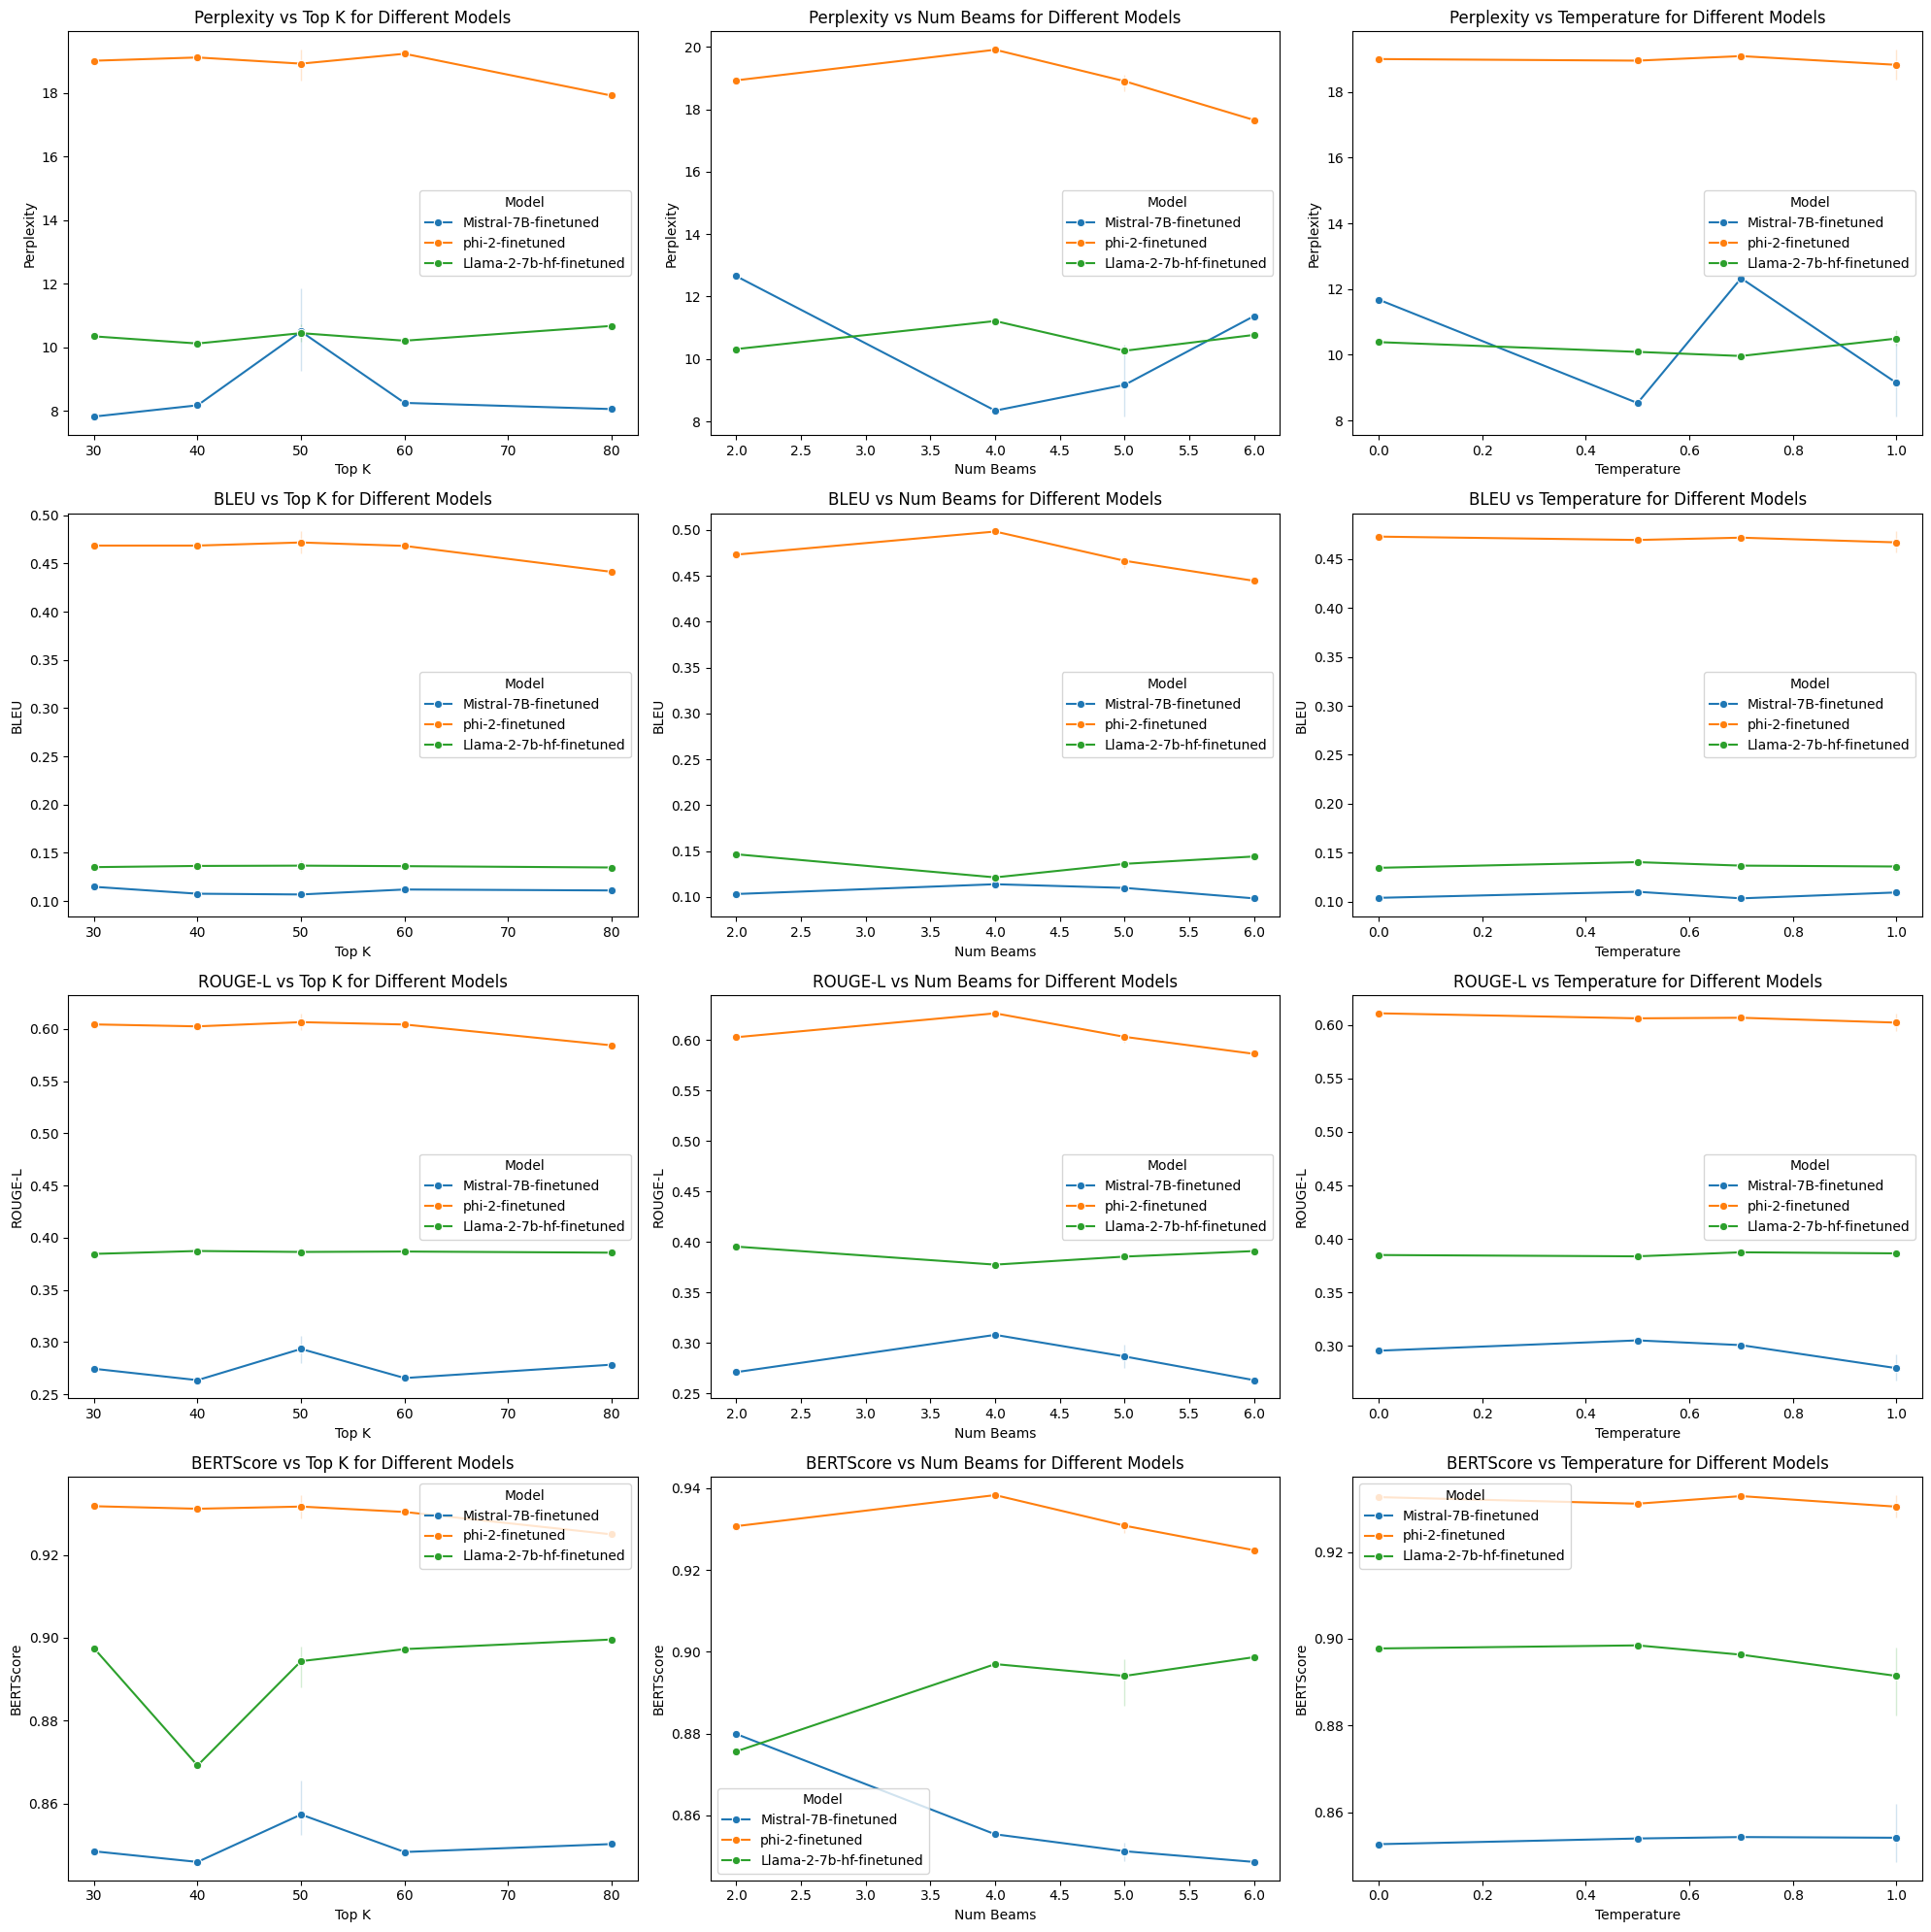

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import re


results = []
for filename in os.listdir('data/section_3/'):
    if filename.endswith('.json') and 'score' in filename:
        with open(f'data/section_3/{filename}', 'r') as f:
            data = json.load(f)
            model_name = filename.split('_')[0]
            top_k = int(re.search(r'topk(\d+)', filename).group(1))
            num_beams = int(re.search(r'nb(\d+)', filename).group(1))
            temperature = float(re.search(r't(\d+(\.\d+)?)', filename).group(1))
            results.append({
                'Model': model_name,
                'Top K': top_k,
                'Num Beams': num_beams,
                'Temperature': temperature,
                **data
            })

df = pd.DataFrame(results)

scores = ['Perplexity', 'BLEU', 'ROUGE-L', 'BERTScore']
parameters = ['Top K', 'Num Beams', 'Temperature']

num_rows = len(scores) * len(parameters) // 3 + (len(scores) * len(parameters) % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
for i, score in enumerate(scores):
    for j, parameter in enumerate(parameters):
        row = (i * len(parameters) + j) // 3
        col = (i * len(parameters) + j) % 3
        ax = axes[row, col]
        sns.lineplot(data=df, x=parameter, y=score, hue='Model', marker='o', ax=ax)
        ax.set_title(f'{score} vs {parameter} for Different Models')
        ax.set_xlabel(parameter)
        ax.set_ylabel(score)
        ax.legend(title='Model')

plt.tight_layout()
plt.show()